****1. Importing necessary libraries****

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

****2. Loading training and test data from the directory****

In [4]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [5]:
#Printing the shape of train and test set images
print('Training images shape:', train_x.shape)
print('Test Images shape', test_x.shape)

#Creating list for all numbers
class_name =['0', '1','2','3','4','5','6', '7','8','9']

Training images shape: (60000, 28, 28)
Test Images shape (10000, 28, 28)


****3. Visualizing Images using matplotlib****

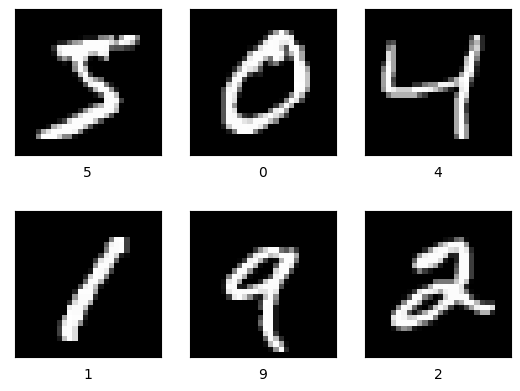

In [6]:
#Visualizing images from our train set
for i in range(6):  
    plt.subplot(2,3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.xlabel(class_name[train_y[i]])
plt.show()

****4. Scaling pixel values of images****

In [7]:
train_x = train_x/255
test_x = test_x/255

In [62]:
#One hot encoding
#n_classes = 10
#train_y = to_categorical(train_y, n_classes)
#test_y = to_categorical(test_y, n_classes)

****5. Building a sequential model****

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(2, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [30]:
#Printing summary of a model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 2)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 2)         38        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 2)          0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 2)           38        
                                                                 
 flatten_4 (Flatten)         (None, 18)               

****6. Training our model****

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

****7. Train the model for few number of iteration****

In [32]:
tf_callback = tf.keras.callbacks.TensorBoard(log_dir='./Log/')
tf_history = model.fit(train_x, train_y, epochs=15, 
                    validation_data=(test_x, test_y), callbacks=[tf_callback])

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 1.6283 - accuracy: 0.4206 - val_loss: 0.9033 - val_accuracy: 0.7694
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2877 - accuracy: 0.5536 - val_loss: 0.7862 - val_accuracy: 0.8083
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2449 - accuracy: 0.5716 - val_loss: 0.7338 - val_accuracy: 0.8155
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 1.2047 - accuracy: 0.5841 - val_loss: 0.7298 - val_accuracy: 0.8239
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 1.1905 - accuracy: 0.5913 - val_loss: 0.7274 - val_accuracy: 0.8250
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1702 - accuracy: 0.5963 - val_loss: 0.6964 - val_accuracy: 0.8266
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1617 - accuracy: 0.5989 - val_loss: 0.6867 - val_acc

In [33]:
tf_history.history

{'loss': [1.6283214092254639,
  1.2876722812652588,
  1.2448500394821167,
  1.2046995162963867,
  1.190511703491211,
  1.1701580286026,
  1.1617215871810913,
  1.1469621658325195,
  1.1369202136993408,
  1.1273608207702637,
  1.1278624534606934,
  1.1166373491287231,
  1.112475037574768,
  1.1014937162399292,
  1.0959964990615845],
 'accuracy': [0.4205833375453949,
  0.5535500049591064,
  0.5716333389282227,
  0.5841333270072937,
  0.5912833213806152,
  0.5962833166122437,
  0.5988666415214539,
  0.6048833131790161,
  0.6080833077430725,
  0.6101333498954773,
  0.6114333271980286,
  0.6165500283241272,
  0.6152833104133606,
  0.6202999949455261,
  0.625],
 'val_loss': [0.9032763838768005,
  0.7862229347229004,
  0.7337611317634583,
  0.7297889590263367,
  0.7273809909820557,
  0.6963961720466614,
  0.6866809129714966,
  0.6652898192405701,
  0.6948890089988708,
  0.6681060791015625,
  0.674984872341156,
  0.7068659663200378,
  0.6633924245834351,
  0.659186601638794,
  0.69692385196685

****Plotting validation and training Loss****

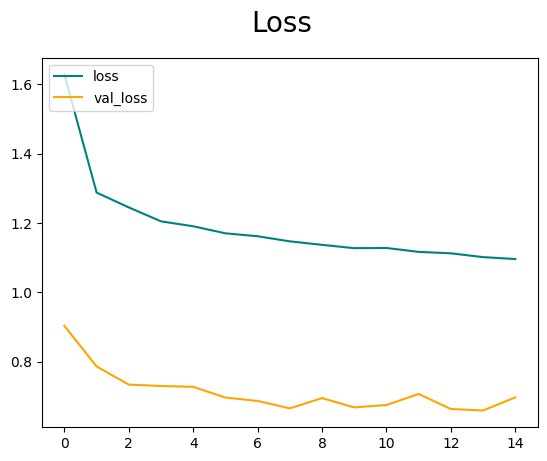

In [34]:
fig = plt.figure()
plt.plot(tf_history.history['loss'], color='teal', label='loss')
plt.plot(tf_history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

****Plotting validation and training accuracy****

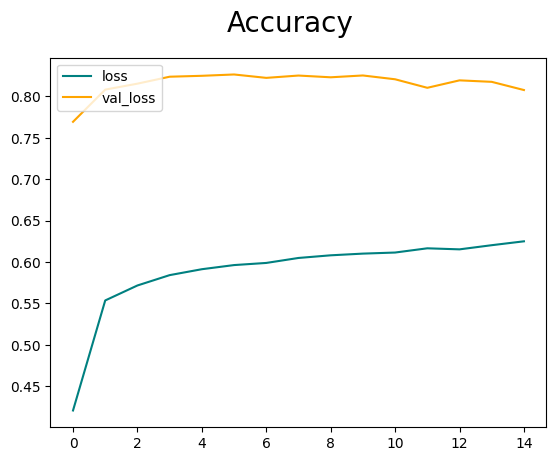

In [35]:
fig = plt.figure()
plt.plot(tf_history.history['accuracy'], color='teal', label='loss')
plt.plot(tf_history.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

****Reading image using cv2 library****

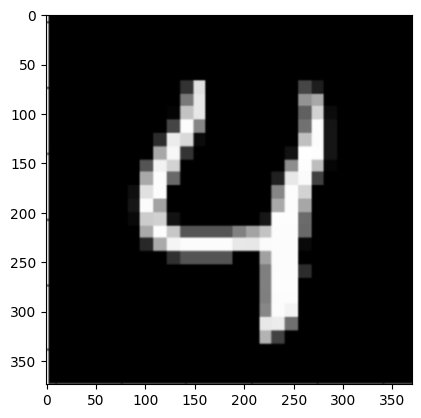

In [36]:
import cv2
img = cv2.imread('mnist-four.png')
plt.imshow(img)
plt.show()

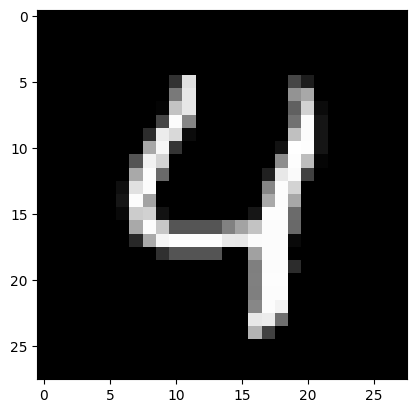

TensorShape([28, 28, 3])

In [39]:
resize = tf.image.resize(img, (28,28))
plt.imshow(resize.numpy().astype(int))
plt.show()
resize.shape

In [43]:
image = tf.keras.utils.load_img('mnist-four.png', grayscale=True, target_size=(28,28))
input_arr = tf.keras.utils.img_to_array(image)
print(input_arr.shape)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
print(predictions)

(28, 28, 1)
1/1 [==============================] - 0s 14ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.8098784e-30
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


**Simple linear module without Maxpooling layers**

In [3]:
model1 = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28,1)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='rmsprop')